# Newton's Method

Newton's method, also known as the Newton-Raphson method, is a powerful numerical algorithm used for finding the roots or zeroes of a function. The method is named after Sir Isaac Newton and Joseph Raphson, who independently developed it in the 17th century.

The basic idea behind Newton's method is to iteratively refine an initial estimate of the root of a function until a desired level of accuracy is achieved. Given an initial guess x0, the method constructs a sequence of estimates x1, x2, x3, ..., by using the following iterative formula:

xn+1 = xn - f(xn) / f'(xn)

where f(x) is the function whose root we are trying to find, and f'(x) is its derivative. The formula says that the next estimate, xn+1, is obtained by subtracting the ratio of the function value and its derivative at xn from xn.

Geometrically, Newton's method can be interpreted as finding the intersection of the x-axis with the tangent line to the function at the current estimate. At each iteration, the tangent line provides a better approximation of the function near the current estimate, and the intersection with the x-axis gives a new, improved estimate.

The convergence of Newton's method is usually very fast, typically quadratic, meaning that the number of correct digits approximately doubles with each iteration. However, the method may not always converge, and may converge to a wrong root if the initial guess is not sufficiently close to the desired root.


Given a function $f(x)$ and an initial guess $x_0$, Newton's method iteratively refines the estimate of the root of the function by using the formula:

$$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$$

where $x_n$ is the current estimate of the root, $f'(x_n)$ is the derivative of the function evaluated at $x_n$, and $x_{n+1}$ is the next estimate of the root. The method continues until a desired level of accuracy is achieved or a maximum number of iterations is reached.

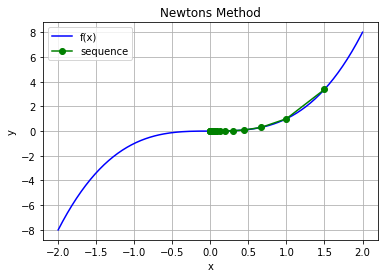

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Define the function
def f(x):
    return x**3

#define its derivative 
def fprime(x):
    return 3*x**2 

# Set the parameters
x0 = 1.5
max_iters = 20

# Initialize the sequence and add the initial guess
x = [x0]
y = [f(x0)]

# Iterate using Newton's method
for i in range(max_iters):
    x.append(x[-1] - f(x[-1]) / fprime(x[-1]))
    y.append(f(x[-1]))

# Plot the function and the iterative sequence
x_vals = np.linspace(-2, 2, 200)
y_vals = f(x_vals)
plt.plot(x_vals, y_vals, 'b-', label='f(x)')
plt.plot(x, y, 'go-', label='sequence')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Newtons Method')
plt.legend()
plt.grid()
plt.show()
